In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fldLoc = '/scratch/srai6/EddyKillingPaper3/CESM/afterSlope/'
dsEP = Dataset(fldLoc + 'avgFiltered_0100.nc')
dsNLM = Dataset(fldLoc + 'avgNLmodelEP_0100km.nc')
dsSlope = Dataset(fldLoc + 'slopeAndCorr2D_0050km.nc')

gridDS= Dataset('/scratch/srai6/EddyKillingPaper3/CESM/newGlobalGrid_tripolePOP_0.1deg.nc')

In [3]:
EP = np.array(dsEP.variables['EddyPowerPerArea'][0,:,:])
NLM = np.array(dsNLM.variables['NLmodel_EPCg'][0,:,:])
slope = np.array(dsSlope.variables['slope'])

UAREA = np.array(gridDS.variables['UAREA'])
KMU = np.array(gridDS.variables['KMU'])
ULAT = np.array(gridDS.variables['ULAT'])

eqmask = abs(ULAT) < 5
landmask = KMU < 40

mask = np.isnan(NLM) + landmask + eqmask

NLM[mask] =float('nan')
EP[mask] = float('nan')

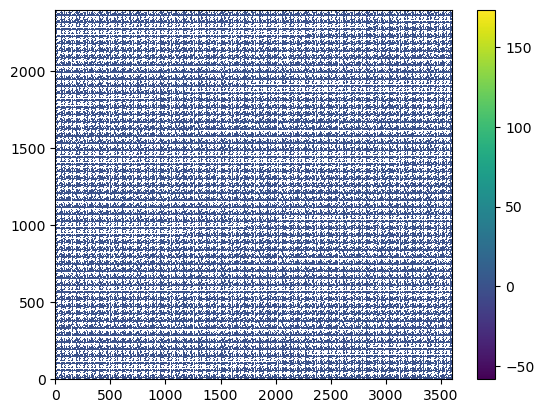

In [4]:
plt.pcolormesh(slope)
plt.colorbar()

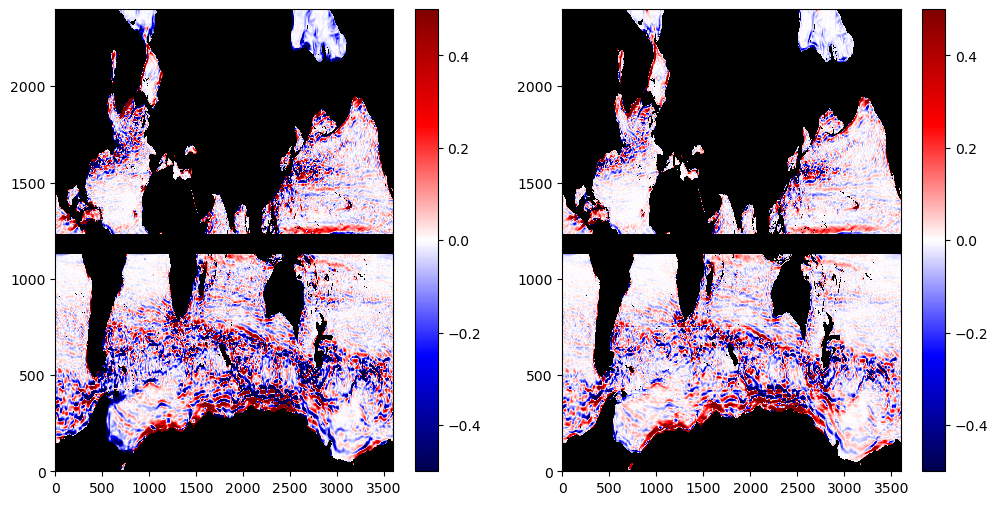

In [5]:
cmap = plt.get_cmap('seismic').copy()
cmap.set_bad('k')
v = 0.5

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax = axes[0]
m = ax.pcolormesh(EP, cmap=cmap, vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)

ax = axes[1]
m = ax.pcolormesh(NLM*1.86, cmap=cmap, vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)

In [6]:
print(np.nansum(UAREA * EP)*1e-7/1e9)
print(np.nansum(UAREA * NLM*1.86)*1e-7/1e9)

-2.986534500302848
0.5594744984712275
